In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np

# Controller design: Loop analysis and shaping

## Feedback Goals

- Stability of the closed loop system
- Performance while tracking inputs
  - tracking error, typically specified in terms of steady state error to specific inputs:
     - e.g., error to step inputs less than $5\%$
  - behaviour of the transient, typically specified in terms of bandwidth, rise time, settling time, damping ratio, overshoot (these are requirements for the transfer function between $Y$ and $Y_{ref}$).
- Robustness to noise measurement and disturbances

See also `06_Intro_to_freq_response_and_bode_plots`

We can design the behavior of the closed loop system by focusing on the open loop transfer function. 

Observation: 
> This same approach was used in studying stability using the Nyquist criterion: we plotted the Nyquist plot for the open loop transfer function to determine the stability of the closed loop system.

## Feedback Design via Loop Shaping

- One advantage of the Nyquist stability theorem is that it is based on the loop transfer function $L = GR$, which is the product of the transfer functions of the process and the controller. 

- Easy to see how the controller influences the loop transfer function. 

- For example, to make an unstable system stable we simply have to bend the Nyquist curve away from the critical point.

- This idea is the basis of several different design methods collectively called **loop shaping**: Choose a compensator that gives a loop transfer function with a desired shape. 

- Example: Determine a loop transfer function that gives a closed loop system with the desired properties and to compute the controller as $R = L/G$ or change the gain of the process transfer function to obtain the desired bandwidth, and then add poles and zeros until the desired shape is obtained.

Let's consider our usual closed loop system:

<tr>
    <td> <img src="img/system-generic.png" alt="system-generic" style="width: 550px;"/> </td>
</tr>


- $d$: disturbance 
- $n$: noise

We want to design $R(s)$:
- Disturbance is rejected
- Noise is attenuated
- Stable and high performance of $G(s)$
- Robustness in case our model of $G(s)$ is different than reality

We will look at the loop transfer function $L(s) = G(s)R(s)$
- From a design perspective, the use of loop analysis tools is very powerful
- If we can specify the desired performance in terms of properties of $L(s)$, we can directly see the impact of changes in the controller R(s) (since we know the plant $G(s)$). 

This is much easier, for example, than trying to reason directly about the tracking response of the closed loop system
- the close loop transfer function is much more complex and given by $H = GR/(1+GR)$.

**Note - Designing a controller:** designing the controller $R$ means choosing _poles_, _zeros_ and the _static gain_ of the controller.**

**Reference**
- A good reference in general and for the loop shaping specifically is "Feedback Systems: An Introduction for Scientists and Engineers" available [here](http://www.cds.caltech.edu/~murray/books/AM08/pdf/am08-complete_22Feb09.pdf) freely to download (See Chapter 10 for details on Loop Shaping)

---------------

### Sensitivity and Complementary Sensitivity Functions (Recap)

(we talked about this in `08_Main_types_of_loops_and_transfer_functions` - please refer to that for more details)

Doing simple algebric manipulation we can express the output $y$ as a function of all the inputs:

$$
Y(s) = D(s) + GR(R-Y+N) \Rightarrow (I+GR) Y(s) = GR \cdot R(s) + D(s) + GR\cdot N(s)
$$

$$
Y(s) = \frac{GR}{1+GR}Y_{ref}(s) + \frac{1}{1+GR}D(s) + \frac{GR}{1+GR}N(s)
$$

We want to design $R$ so that all transfer functions have good properties
- tracking (at freq. where this is important)
- disturbance rejection (at freq. where this is important)
- noise attenuation (at freq. where this is important)

And we can explict the equation above as a set of transfer functions:

$$
E(s) = \frac{1}{1+GR}Y_{ref}(s), \hspace{2cm} Y(s) = \frac{1}{1+GR}D(s)
$$

$$
Y(s) = \frac{GR}{1+GR}Y_{ref}(s), \hspace{2cm} Y(s) = \frac{GR}{1+GR}N(s)
$$

$$
U(s) = \frac{R}{1+GR}Y_{ref}(s) \hspace{2cm} \hspace{4cm}
$$


We called:

- Sensitivity Function: $S = \frac{1}{1+GR}$ 
- Complementary Sensitivity Function: $T = \frac{GR}{1+GR}$ 

We can re-write these functions in terms of the loop transfer function $L$:

- Sensitivity Function: $S = \frac{1}{1+L}$
- Complementary Sensitivity Function: $T = \frac{L}{1+L}$

and we also know that $S+T=I$ for all frequencies

## Design Considerations: suitable shape

Let's first discuss a suitable shape for the **loop transfer function** that gives good performance and good stability margins. 
- Remember that the objective is that of designing a suitable $R$.

Let's re-write the previous equation expliciting the error term: $\epsilon=y_{ref} - y +n$

$$
\epsilon = S Y_{ref}(s) - S D(s) - T N(s)
$$

- we are not interested in the value of $y$ so much (we want $y \rightarrow y_{ref}$)
- we want $\epsilon = 0$ for any disturbance, noise and reference that are reasonable for my system

**Goals:**
- Good reference tracking for a sufficently slow change in reference hence for slow frequencies (e.g., think of a cruise control)
  - With want $|S|$ small at low frequency
  - This is also true for low freq. disturbances
  
- Noise is generally high frequency
  - We need $|T|$ small at high frequency
  
- Since $S+T=I$ they cannot be "small" all the time, and we need to have a good compromise leveraging the complementary behaviour that we often have between low frequency signals (references and disturbances) and high frequency signals (noise):

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/loop-shaping-splut-mag.png" alt="sensitivity-and-complementary-with-freq" style="width: 700px"/> </td>
</tr>
</table>   

- Cross-over frequency $w_c$:
   - Where the $S$ begins to be large, and where the $T$ begins to be small
   - $w_c$ makes it possible to choose where I think noise dominate vs disturbance dominate 
   - Note that $T$ should be close to 1 in low frequency for $y=y_{ref}$.
   
   
Given that we now know how we would like $S$ and $T$ to look like, we can also start defining how $L$ should look like.

- $L(s)$ includes the controller $R(s)$ that I can design to give me a good $L$.

--------------------

- $L(s)=G(s)R(s)$
- $S(s)=\frac{1}{1+L(s)}$
- $T(s)=\frac{L}{1+L(s)}$


<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/loop-shapinig-L-mag.png" alt="loop-shapinig-L-mag" style="width: 700px"/> </td>
</tr>
</table>   

- A would like to design my controller $R(s)$ so that the $L$ loop transfer function looks like and integrator
- Note that moving $L$ to the right or to the left means choosing the correct gain $K$:

$$
L(s)=\frac{K}{s}
$$

- Higher $K$ means higher frequency reference tracking and disturbance rejection
- Smaller $K$ means lower bandwidth performance (e.g., noisy sensors at lower frequencies)


- Note that where the $L(s)=\frac{K}{s}$ crosses the $0$ dB line is where we are dividing between low and high frequency

------------------

- Good performance requires that the loop transfer function is large for frequencies where we desire good tracking of reference signals and good attenuation of low-frequency load disturbances.

- Since $S = 1/(1 + L)$: for frequencies where $|L| > 100$ disturbances will be attenuated by approximately a factor of 100 or more and the tracking error is less than $1\%$. 
   - Remember that 
    $$
    E(s) = \frac{1}{1+GR}Y_{ref}(s)
    $$


- The transfer function from measurement noise to control action is $C_S = R/(1 + L)$. To avoid injecting too much measurement noise, which can create undesirable control actions, the controller transfer function $R$ should have low gain at high frequencies (_high-frequency roll-off_). 

- Given these constraints, the loop transfer function $L=GR$ should thus have roughly the shape:

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/loopshaping-desired-shape.png" alt="loopshaping-desired-shape" style="width: 750px"/> </td>
</tr>
</table>    


- It has unit gain at the gain crossover frequency ($|L(i\omega_{gc})| = 1$), large gain for lower frequencies, and small gain for higher frequencies.

- The crossover frequency $\omega_{gc}$ determines the attenuation of load disturbances, bandwidth, and response time of the closed loop system. 
- The slope $n_{gc}$ of the gain curve of $L(s)$ at the gain crossover frequency $\omega_{gc}$ determines the robustness of the closed loop systems. 
- Good robustness requires good stability margins, which imposes requirements on the loop transfer function around the gain crossover frequency $\omega_{gc}$. 
- Desirable to transition from high loop gain $|L(i\omega))|$ at low frequencies to low loop gain as quickly as possible. 
- Robustness requirements impose restrictions on how fast the gain can decrease.
    - It is possible to verify that, for a minimum-phase system:
    $ n_{gc} \approx -2 + \frac{\varphi_m}{90}$, where $\varphi_m$ is the phase margin in degrees.
    - A steeper slope thus gives a smaller phase margin.
    - Time delays and poles and zeros in the right half-plane impose further restrictions


- At low frequencies, a large magnitude of $L$ provides good load disturbance rejection and reference tracking
- At high frequencies a small loop gain avoids injecting too much measurement noise.



### Loop shaping

- Is a trial-and-error procedure
- We typically start with a Bode plot of the process transfer function $G$
- Choosing the gain crossover frequency $\omega_{gc}$ is a major design decision: a compromise between attenuation of load disturbances and injection of measurement noise
- Finally shape the loop transfer function by changing the controller gain and adding poles and zeros to the controller transfer function
- The controller gain at low frequencies can be increased by so-called _lag compensation,_ and the behavior around the crossover frequency can be changed by so-called _lead compensation._

### A simple example for cruise control

Model of the car:

$$
\dot{x} = -x + u\\
y = x
$$

with transfer function

$$
\frac{Y(s)}{U(s)} = G(s) = \frac{1}{s+1}
$$


- We would like to have $L(s)=G(s)R(s) = \frac{K}{s}$
- We know that $G(s) = \frac{1}{s+1}$

$$
\frac{1}{s+1}R(s) = \frac{K}{s} \Rightarrow R(s)=\frac{K(s+1)}{s}
$$


- This solves the problem

---
- Is there any problem with this approach?
- We are inverting the plant $G(s)$ to solve for the controller
- Inverting the plant with a RHP pole (or zero) would imply a RHP zero (or pole): we are making the overall system unobservable exactly where our system is unstable (critical cancellation: the system is internally unstable and we would not even be able to tell measuring the output)
- What happens if the real system is not exactly equal to my model $G(s)$?
    - Feedback helps, but we will need to make this more robust



Key point:
- I can shape the loop T.F. $L$
- There is a $R$ that gives the shape I like
- When I use the $R$ as controller I should get good system performance

Let's try this in Python

In [ ]:
s = control.tf([1, 0],[1])

car_tf = 1/(s+1)
print(car)


  1
-----
s + 1



In [ ]:
desiredLoop = 10/s

# Controller
R = desiredLoop/car_tf
print(R)


10 s + 10
---------
    s



We can then create our system:

In [ ]:
sysLoop = control.series(R, car_tf) # Loop T.F.
sysCL = control.feedback(sysLoop, 1, -1) # Close loop T.F.

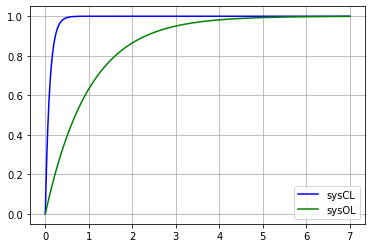

In [ ]:
t, y = control.step_response(sysCL, T=7)

t_ol, y_ol = control.step_response(car_tf, T=7) # open loop - no control here

plt.plot(t, y, color='b', label='sysCL')
plt.plot(t_ol, y_ol, color='g', label='sysOL')

plt.grid()
plt.legend()

Let's see what happens if we had a slight mismatch between the car and our model

In [ ]:
realCar_tf = 1/(s+0.5)
print(realCar_tf)


   1
-------
s + 0.5



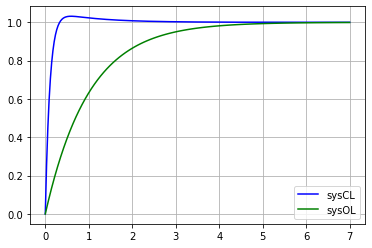

In [ ]:
sysLoop = control.series(R, realCar_tf) # Loop T.F.
sysCL = control.feedback(sysLoop, 1, -1) # Close loop T.F.

t, y = control.step_response(sysCL, T=7)

t_ol, y_ol = control.step_response(car, T=7) # open loop - no control here

plt.plot(t, y, color='b', label='sysCL')
plt.plot(t_ol, y_ol, color='g', label='sysOL')

plt.grid()
plt.legend()

Let's see what the Loop Transfer Function looks like as a Bode Plot

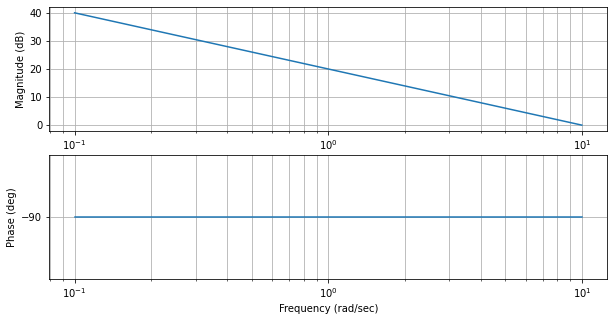

In [ ]:
sysLoop = control.series(R, car_tf)
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
control.bode_plot(sysLoop, dB=True);

axs[1].set_ylim(0, -100);

Which is an integrator,

and the desired one:

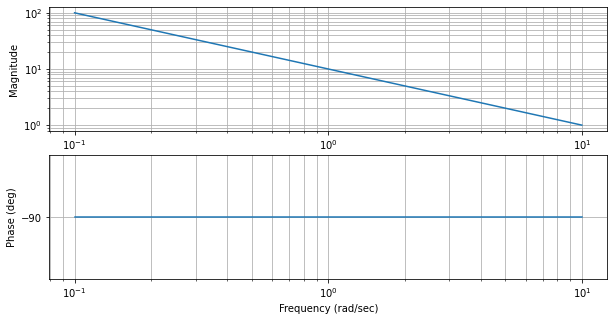

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
control.bode_plot(desiredLoop, dB=True);

And as expected, they are exactly the same.

### Sensitivity and Robustness

- We know that the sensitivity gives an indication of robustness

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/loopshaping-desired-shape.png" alt="loopshaping-desired-shape" style="width: 750px"/> </td>
</tr>
</table>    

- We saw this with Nyquist plots already.
    - I would like my $L(s)$ as far away as possible from the -1 point
    - The distance from -1 is the stability margin we have (gain and phase)
    - Since $S=\frac{1}{1+L}$, the closer $L$ is to -1, and hence the less robust it is, the bigger $S$ is (at that frequency).
    
    

_Nominal sensitivity peak_
$$
M_s = \max_{0 \leq \omega \leq \infty} | S(j\omega) | = \max_{0 \leq \omega \leq \infty} \Big| \frac{1}{1+G(j\omega)R(j\omega)} \Big|
$$

- $M_s$ gives us an indication of how far $L$ is from -1

- We want $S$ to have a small peak so that we can accept:
  - larger uncertainty in our model
  - time delays (e.g., slower than expected computation, or response)
  - RHP zeros of P
  
  
- time delays and RHP zeros of P limits how small the sensitiviy peak can be: fundamental lack of robustness of the system
- in this case we need to have a smaller bandwidth (less performance): this would level off the sensitivity function sooner

Intuitively
- if I have a time delay of 1s, I cannot control something that moves at 500Hz
- A RHP zeros acts similarly to a time delay (for ex. look at the step response)

### Analysis: More Comments

- We want to understand the properties of the closed loop system $H$ analysing the Bode plot of $L$
- From now on, we will assume that $L$ is BIBO stable (we will accept to have up to 2 poles at the origin).



- What happens if $G$ is unstable? We design a first regular to stabilise it and a second one that meets performance requirements

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/loop-shaping-if-G-not-stable.png" alt="loop-shaping-if-G-not-stable" style="width: 750px"/> </td>
</tr>
</table>    


Let's go back to our system

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/system-generic.png" alt="system-generic" style="width: 550px;"/> </td>
</tr>
</table> 

$$
H(s) = \frac{R(s)G(s)}{1+R(s)G(s)} = \frac{L(s)}{1+L(s)}
$$

- The "+" sign at the denominstator depends on the summation node in the feedback loop
- However, $L(s)$ has magnitude and _phase_: when the phase is < -180 this is equivalent to summing reference input and measured output
- The feedback loop can only sustain the change in sign if the $L(s)$ < 1 (we saw this with Nyquist).

## Closed loop stability - Case 1

- $L(j\omega)$
- Given $\omega_{gc} : |L(j\omega)|=1$

- $|L(j\omega)| > 1$, for $\omega < \omega_{gc} $, and $|L(j\omega)| < 1$, for $\omega > \omega_{gc} $,
- if $\angle L(j\omega) > -180$, then $H=\frac{L(s)}{1+L(s)}$ is BIBO stable

- _When the magnitude plot crosses 0dB then phase must be > -180$^o$_


- We are revisiting the phase margin: how much can the phase change before the system becomes unstable.
- Note that, the phase margin is a robustness metric with respect to fixed delays: delay $\tau$, means phase shift: $\omega\tau$.


## Closed loop stability - Case 2

- $L(j\omega)$
- Given $\omega_{gc} : \angle L(j\omega)|=-180^o$

- $\angle L(j\omega) > -180$, for $\omega < \omega_{gc} $, and $\angle L(j\omega) < -180$, for $\omega > \omega_{gc} $,
- if $|L(j\omega)| < 1$, then $H=\frac{L(s)}{1+L(s)}$ is BIBO stable

- _When the phase plot crosses -180$^o$ then the magnitude must be < 1 (0dB)_

- We are revisiting the gain margin: how much can the gain can change before the system becomes unstable.
- Note that, the gain margin is a robustness metric with respect to uncertainties in the static gain of the loop transfer function $L$. 

## Tracking errors

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/loop-shaping-tracking-errors.png" alt="loop-shaping-tracking-errors" style="width: 550px;"/> </td>
</tr>
</table> 

$$
E(s) = \frac{1}{1+RG}Y_{ref}(s) = \frac{1}{1+L}Y_{ref}(s)
$$

- We are interested in understanding how the error evolves over time, and when $t \rightarrow \infty$
- With varying input signals. Typically, step, ramp, parabolic input, etc
   $$u(t)=1(t); \hspace{0.5cm} u(t)=t ; \hspace{0.5cm} u(t)=\frac{t^2}{2} $$
   
   whose transfer functions are:
   $$U(s) = \frac{1}{s} \hspace{0.5cm} U(s) = \frac{1}{s^2} ; \hspace{0.5cm} U(s) = \frac{1}{s^3} $$
   
   

Or in the frequency domain:

$$
E(j\omega) = \frac{1}{1+L(j\omega)}Y_{ref}(s)
$$

- Analysing the behaviour of $e$ for $t \rightarrow \infty$, means analysing $E(j\omega)$ for $\omega \rightarrow  0 $.

- $L(j\omega)$ should be as large as possible for low frequencies (as long as closed loop stability is maintained).

- Systems of type 1 or 2: $L(j\omega) \rightarrow \infty$ when $\omega \rightarrow 0$
  - Remember that a system has type $n$ if its loop transfer function $L(s)$ has $n$ poles at the origin.

- If the process $G$ does not satisfy our requirements, we can act on the controller $R$
- Note: to analyse the steady state of a system we must have closed loop stability, or we do not even have steady state!

## Relationship between loop function harmonic response and closed loop

- What is the relationship between the harmonic response of the loop transfer function $L(j\omega)$ and the closed loop $H(j\omega)$

$$
|H(j\omega)| = \frac{|L(j\omega)|}{|1+L(j\omega)|} = \frac{|L(j\omega)|}{\sqrt{1+|L(j\omega)|^2}}
$$

- when $\omega \rightarrow 0$, to guarantee low tracking errors: $|L(j\omega)| >> 1 \Rightarrow |H(j\omega)| \approx \frac{|L(j\omega)|}{|L(j\omega)|} = 1$ 

- when $\omega \rightarrow \infty$, $|L(j\omega)| << 1 \Rightarrow |H(j\omega)| \approx \frac{|L(j\omega)|}{1} = |L(j\omega)|$, because $L$ is a causal system and must have more poles than zeros.

Let's consider again (see `06_Intro_to_freq_response_and_bode_plots`):

$$
L(s) = \frac{1000}{(s+1)^3(s+10)}
$$

$$
H(s) = \frac{L(s)}{1+L(s)}
$$

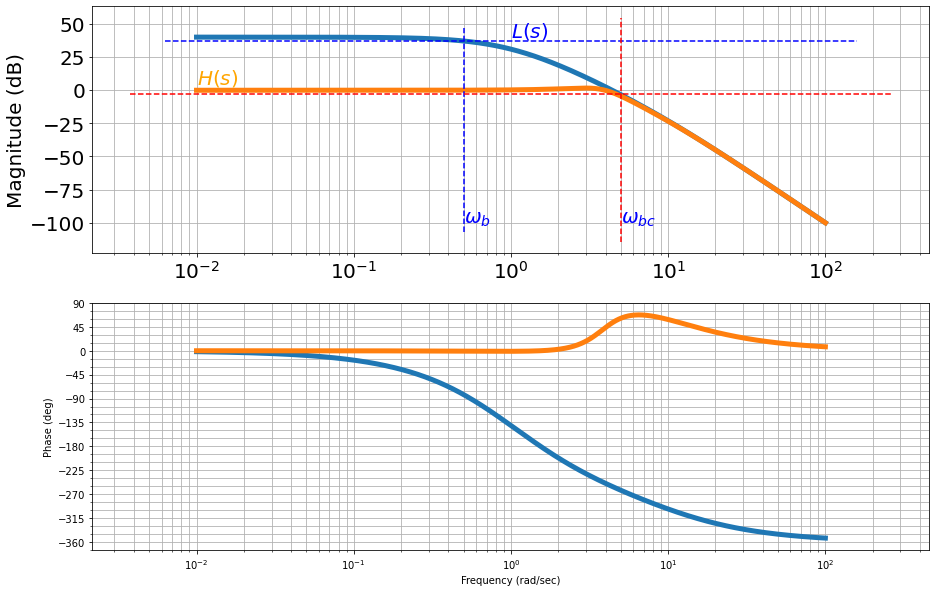

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(control.tf([1000],[1, 13, 33, 31, 10]), dB=True, omega_limits=(0.01, 100), linewidth=5);
mag_cc, phase_cc, omega_cc = control.bode(control.tf([1000],[1, 13, 33, 31, 10+1000]), dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[40-3, 40-3],'b--')
plt.plot([0.5, 0.5],plt.ylim(),'b--');
plt.text(1, 40, '$L(s)$', color='blue', fontsize=20)
plt.text(0.5, -100, '$\omega_b$', color='blue', fontsize=20)

plt.plot(plt.xlim(),[-3, -3],'r--')
plt.plot([5, 5],plt.ylim(),'r--')
plt.text(0.01, 5, '$H(s)$', color='orange', fontsize=20)
plt.text(5, -100, '$\omega_{bc}$', color='blue', fontsize=20);

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(20);

- From the discussions above, we have that:
$|L(j\omega)| \approx 1$ in the mid-frequency range, and we call _gain crossover frequency $\omega_{gc}$_ where L(j\omega) crosses 0dB.

- Assuming a dominant pole approximation, we expect $H$ to behave similarly to a first-order or a second-order system.
   - This can **empirically** be determined from the phase margin ($\phi_m > 75^o$, first order, otherwise second order). 
   - Empirically means that must be verified through simulation/experiments but it is useful to kick off the analysis

### Loop analysis: discussions and conclusions

- The closed loop system $H$ has normally a low-pass filter-like behaviour
- $H$ can typically be approximated by a single real pole when $\varphi_m > 75^o$ (first-order system), or with two complex conjugate poles otherwise
- The break frequency approximate the 0dB cut-off frequency of $L$
- And this also approximate the system bandwidth
- The system damping ratio: $\xi \approx \frac{\varphi_m}{100}$, when $\varphi_m \le 75^o$
- Approximating $H$ as discussed makes it possible to calculate the transient behaviour of $H$ based on the phase margin $\varphi_m$ and its gain crossover frequency

#### Example: from phase margins to closed loop transient behaviour

- Requirement: maximum overshoot $S \le 15\%$

- We know (see `05_System_response`) that the maximum overshoot is: 
  $$
  \large
  S = 100e^{-\frac{\xi\pi}{\sqrt{1-\xi^2}}}
  $$
  
  we can then solve for $\xi$:
  $$
  \frac{S}{100} = e^{-\frac{\xi\pi}{\sqrt{1-\xi^2}}} 
  $$
  
  $$\Downarrow$$
  
  $$
  \ln{\frac{S}{100}} = {-\frac{\xi\pi}{\sqrt{1-\xi^2}}} 
  $$
  
  $$\Downarrow$$  
  
  $$
  \ln{\frac{S}{100}}\cdot\sqrt{1-\xi^2} = {-\xi\pi} 
  $$
  
  $$\Downarrow$$  
  
  $$
    \Big(\ln{\frac{S}{100}}\Big)^2 \Big({1-\xi^2}\Big) = {\xi^2\pi^2} 
  $$
  
  $$\Downarrow$$  
  
  $$
    \Big(\ln{\frac{S}{100}}\Big)^2 = {\xi^2\pi^2} + \Big(\ln{\frac{S}{100}}\Big)^2 \xi^2
  $$

  $$\Downarrow$$  
  
  $$
    \xi \ge \sqrt{ \frac{\Big(\ln{\frac{S}{100}}\Big)^2}{\Big(\ln{\frac{S}{100}}\Big)^2+\pi^2}}  \approx 0.5
  $$
  
  and finally:
  
  $$\varphi_m \approx 100\xi \ge 50^o$$

## Example: Car Driving Uphill

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/9.car-uphill.png" alt="9.car-uphill.png" style="width: 350px;"/> </td>
</tr>
</table>

See also `02_Intro_to_control_theory` and `04_Block_Diagrams` (Section "Example: Car driving uphill")

$$
G(s) = \frac{\gamma}{m}\frac{1}{s+\beta/m} = \frac{10}{s+0.1}
$$

- Assuming disturbance $\theta=0$

- Design Requirements:
  - Zero tracking error to step inputs
  - $5\%$ tracking error to ramp inputs
  - No overshoot
  - Settling time (95\%) to step inputs $< 15s$

Let's see how to translate these requirements into requirements for the loop transfer function and how to design a controller $R$ such that $L=RG$ meets all requirements

- Zero tracking error to step inputs $\Rightarrow$ system type 1, we need $R$ with a pole at the origin
- $5\%$ tracking error to ramp inputs:
    $$
    E(s) = \frac{1}{1+\frac{10}{s+0.1}\frac{K}{s}} \frac{1}{s^2}
    $$
   

And using the final value theorem:

$$E_{ss} = \lim \limits_{s\rightarrow0} s\frac{U(s)}{1+G(s)} = s \frac{1}{1+\frac{10}{s+0.1}\frac{K}{s}} \frac{1}{s^2}$$

We obtain: $K>0.2$ (or $> -14 dB$)

- No overshoot $\Rightarrow$ real pole ($\varphi_m \ge 75^o$)

- Settling time (95\%) to step inputs $< 15s$:
  - Since $t_s = -\tau \ln0.05$ $\Rightarrow$ Pole Break Frequency $\omega > 0.2$ rad/s


Let's use the Python Control Library to try out some controllers.

In [ ]:
# Process
G = control.tf([10],[1, 0.1])
print('G: {}'.format(G))

# Controller
K = 1
R = control.tf([K],[1, 0])
print('R: {}'.format(R))

# Closed loop system
H = R*G/(1+R*G)

print('H: {}'.format(H))

G: 
  10
-------
s + 0.1

R: 
1
-
s

H: 
         10 s^2 + s
-----------------------------
s^4 + 0.2 s^3 + 10.01 s^2 + s



We can now plot the Bode plots.

- note that we are plotting both $L$ and $H$, but we are really interested in understanding how to shape $L$ so that $H$ behaves as we want: $H$ is there as a reference.

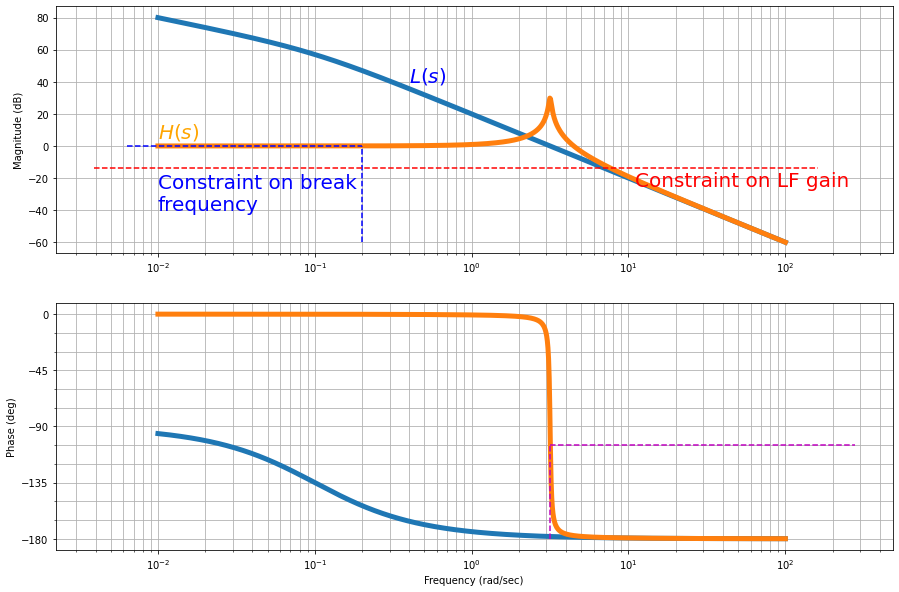

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(R*G, dB=True, omega_limits=(0.01, 100), linewidth=5);
mag_cc, phase_cc, omega_cc = control.bode(H, dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(0.4, 40, '$L(s)$', color='blue', fontsize=20)
plt.text(0.01, 5, '$H(s)$', color='orange', fontsize=20)



#plt.plot(plt.xlim(),[40-3, 40-3],'b--')
# Break frequency: w>=0.2 rad/s
plt.plot([plt.xlim()[0], 0.2], [0, 0],'b--');
plt.plot([0.2, 0.2], [-60, 0],'b--');
plt.text(0.01, -40, 'Constraint on break \nfrequency', color='blue', fontsize=20);

plt.plot(plt.xlim(),[-14, -14],'r--');
plt.text(11, -25, 'Constraint on LF gain', color='red', fontsize=20);

plt.sca(ax2)                 # phase plot
plt.plot([3.16, 3.16], [-180, -180+75], 'm--')
plt.plot([3.16, plt.xlim()[1]], [-180+75, -180+75], 'm--')
plt.text(4, -135, 'Constraint on Phase Margin', color='m', fontsize=20);

In [ ]:
[gm, pm, sm, wpc, wgc, wms] = control.stability_margins(R*G)
print('Gain Margin: ', gm)
print('Phase Margin (deg): {} (at f={})'.format(pm, wgc))

# gm (float or array_like) – Gain margi
# pm (float or array_like) – Phase margin
# sm (float or array_like) – Stability margin, the minimum distance from the Nyquist plot to -1
# wpc (float or array_like) – Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
# wgc (float or array_like) – Gain crossover frequency (where gain crosses 1), which is associated with the phase margin.
# wms (float or array_like) – Stability margin frequency (where Nyquist plot is closest to -1)

Gain Margin:  inf
Phase Margin (deg): 1.8117006141631293 (at f=3.161487189599213)


**Phase margin is not enough**

Let's see what the step response would be:

Text(0, 0.5, 'step response')

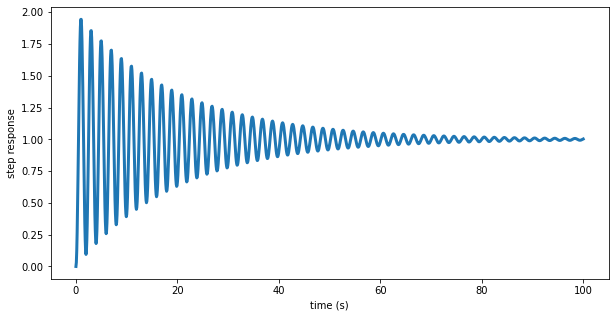

In [ ]:
[t, yout] = control.step_response(H, T=100);

fig, axs = plt.subplots(1, 1, figsize=(10,5))
plt.plot(t, yout, linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('step response')

- The system overshoots, and oscillates.
- We need to increase the phase at the frequence where $|L|=0 dB$

For example:

$$
R(s) = \frac{s+0.5}{s}
$$


In [ ]:
# Process
G = control.tf([10],[1, 0.1])
print('G: {}'.format(G))

# Controller
R = control.tf([1, 0.5],[1, 0])
print('R: {}'.format(R))

# Closed loop system
H = R*G/(1+R*G)

print('H: {}'.format(H))

G: 
  10
-------
s + 0.1

R: 
s + 0.5
-------
   s

H: 
     10 s^3 + 6 s^2 + 0.5 s
---------------------------------
s^4 + 10.2 s^3 + 6.01 s^2 + 0.5 s



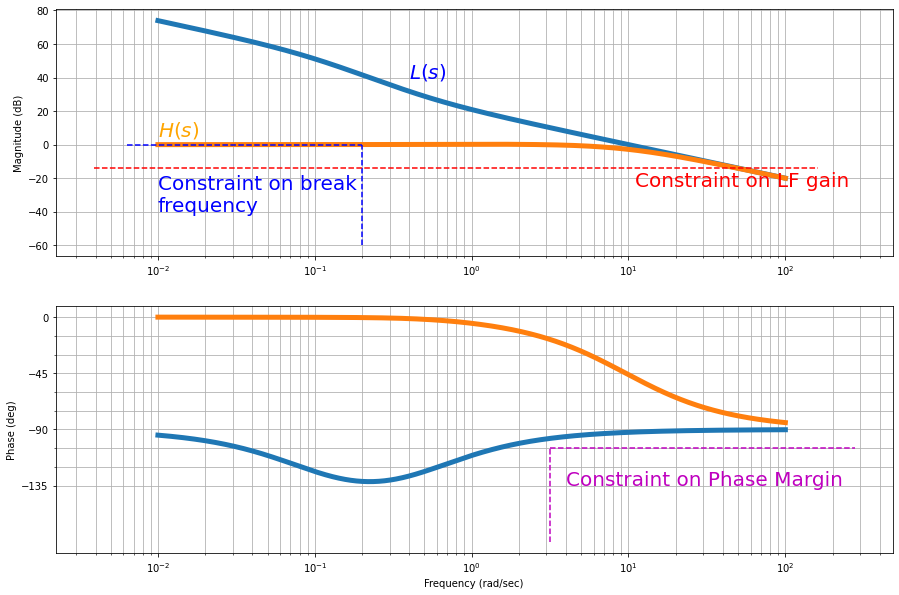

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(R*G, dB=True, omega_limits=(0.01, 100), linewidth=5);
mag_cc, phase_cc, omega_cc = control.bode(H, dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(0.4, 40, '$L(s)$', color='blue', fontsize=20)
plt.text(0.01, 5, '$H(s)$', color='orange', fontsize=20)

# Break frequency: w>=0.2 rad/s
plt.plot([plt.xlim()[0], 0.2], [0, 0],'b--');
plt.plot([0.2, 0.2], [-60, 0],'b--');
plt.text(0.01, -40, 'Constraint on break \nfrequency', color='blue', fontsize=20);

plt.plot(plt.xlim(),[-14, -14],'r--');
plt.text(11, -25, 'Constraint on LF gain', color='red', fontsize=20);

plt.sca(ax2)                 # phase plot
plt.plot([3.16, 3.16], [-180, -180+75], 'm--')
plt.plot([3.16, plt.xlim()[1]], [-180+75, -180+75], 'm--')
plt.text(4, -135, 'Constraint on Phase Margin', color='m', fontsize=20);

And now we have improved substantially the phase margin:

In [ ]:
[gm, pm, sm, wpc, wgc, wms] = control.stability_margins(R*G)
print('Gain Margin: ', gm)
print('Phase Margin (deg): {} (at f={})'.format(pm, wgc))

# gm (float or array_like) – Gain margi
# pm (float or array_like) – Phase margin
# sm (float or array_like) – Stability margin, the minimum distance from the Nyquist plot to -1
# wpc (float or array_like) – Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
# wgc (float or array_like) – Gain crossover frequency (where gain crosses 1), which is associated with the phase margin.
# wms (float or array_like) – Stability margin frequency (where Nyquist plot is closest to -1)

Gain Margin:  inf
Phase Margin (deg): 87.71326345329157 (at f=10.011962990448804)


Let's verify what the step response is now:

Text(0, 0.5, 'step response')

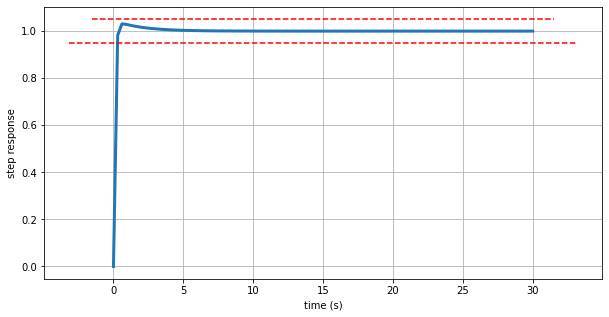

In [ ]:
[t, yout] = control.step_response(H, T=30);

fig, axs = plt.subplots(1, 1, figsize=(10,5))
plt.plot(t, yout, linewidth=3)

plt.grid()
plt.plot(plt.xlim(), [1+0.05, 1+0.05], 'r--')
plt.plot(plt.xlim(), [1-0.05, 1-0.05], 'r--')
plt.xlabel('time (s)')
plt.ylabel('step response')

## Loop shaping: some more discussions

- The "barriers" on the Bode plots are there to help us shape the desired harmonic response of the loop function
- We need to translate design requirements into requirements on the Bode plot of the loop funtion
- Represent these requirements as admissible/non-admissible regions
- The controller is design so that the loop function always stays within the admissible regions

## Disturbance rejections: load variations

<table style='margin: 0 auto' rules=none>
<tr>
    <!--td> <img src="img/disturbances-1.png" alt="disturbances-1" style="width: 550px;"/> </td-->
    <td> <img src="img/system-generic.png" alt="system-generic" style="width: 550px;"/> </td>
</tr>
</table>



$$
Y(s) = \frac{1}{1+RG}D(s) = \frac{1}{1+L}D(s) 
$$

Sensitivity function:
$$
S = \frac{1}{1+L(s)}
$$

- Describes how feedback influences the disturbances
- If $|L|=|RG|$ is large at frequencies where the power of the disturbance is concentrated, then $|S|$ is small and the effect of the disturbance on the output is attenuated
- Lower values of $|S|$ means higher attenuation of the external disturbance.
- Typically, plant disturbances are low frequency, and one would like $|L|=|RG|$ to be large at low frequency


Complementary Sensitivity function:
$$
T = \frac{L(s)}{1+L(s)}
$$

- Maps the noise input $n$ to the output $y$
- Noise rejection defines high frequency specifications
- $S+T=1$

- Note that $T$ is also the transfer function from $y_{ref}$ to $y$.
- If $|L|=|RG|$ is small at frequencies where the noise $n$ is concentrated then $|T|$ will be small and the effect of the noise on the output is minimised.
- Measurement noise tend to occur at high frequency and this means that typically we would like $|L|=|RG|$ to be small at high frequency
- This constraint does not conflict with the low-frequency constraints for the disturbance $d$ and the reference $y_{ref}$.



Let's see what happens a bit more:

In [ ]:
# Process
G = control.tf([10],[1, 0.1])
print('G: {}'.format(G))

# Controller
R = control.tf([1, 0.5],[1, 0])
print('R: {}'.format(R))

# Closed loop system
H = R*G/(1+R*G)
print('H: {}'.format(H))

# Sensitivity
S = 1/(1+R*G)
print('S: {}'.format(S))

# Complementary Sensitivity
T = R*G/(1+R*G)
print('T: {}'.format(T))


G: 
  10
-------
s + 0.1

R: 
s + 0.5
-------
   s

H: 
     10 s^3 + 6 s^2 + 0.5 s
---------------------------------
s^4 + 10.2 s^3 + 6.01 s^2 + 0.5 s

S: 
  s^2 + 0.1 s
----------------
s^2 + 10.1 s + 5

T: 
     10 s^3 + 6 s^2 + 0.5 s
---------------------------------
s^4 + 10.2 s^3 + 6.01 s^2 + 0.5 s



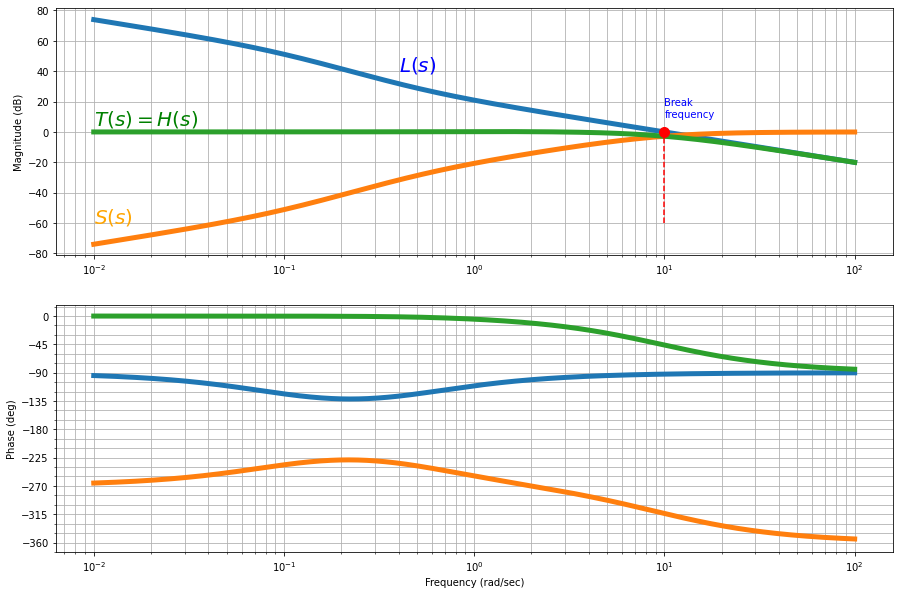

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(R*G, dB=True, omega_limits=(0.01, 100), linewidth=5);
mag_s, phase_s, omega_s = control.bode(S, dB=True, omega_limits=(0.01, 100), linewidth=5);
mag_t, phase_t, omega_t = control.bode(T, dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(0.4, 40, '$L(s)$', color='blue', fontsize=20)
plt.text(0.01, 5, '$T(s) = H(s)$', color='green', fontsize=20)
plt.text(0.01, -60, '$S(s)$', color='orange', fontsize=20);

plt.plot([10], [0],'r.', markersize=20);
plt.plot([10, 10], [-60, 0],'r--');
plt.text(10, 10, 'Break \nfrequency', color='blue', fontsize=10);

- It is not possible to reject load disturbances for frequencies where $H$ is small, i.e., high frequency. But this is OK, since usually load disturbances are at low frequencies.
- Or if we look at the sensitivity function $S$, it is not possible to reject load disturbances for frequencies higher than the break frequency

- These observations translate into low frequency constraints in the Bode plot of the loop transfer function: we need $L$ large at low frequency to obtain a small $S$.


$$
|S(j\omega)| \le \epsilon, \hspace{0.5cm} \text{when} \hspace{0.5cm} \omega \in [0, \omega_n]
$$

$$
\Downarrow
$$


$$
|1+L(j\omega)| \ge \frac{1}{\epsilon}, \hspace{0.5cm} \approx |L(j\omega)| \ge \frac{1}{\epsilon}
$$

- This means that rejecting load distubances translates into a new constraint at low frequency in the Bode plot of the loop transfer function

For instance, using our previous example:

- Requirement: attenuation of load disturbances by at least 20dB up until 0.06 rad/s

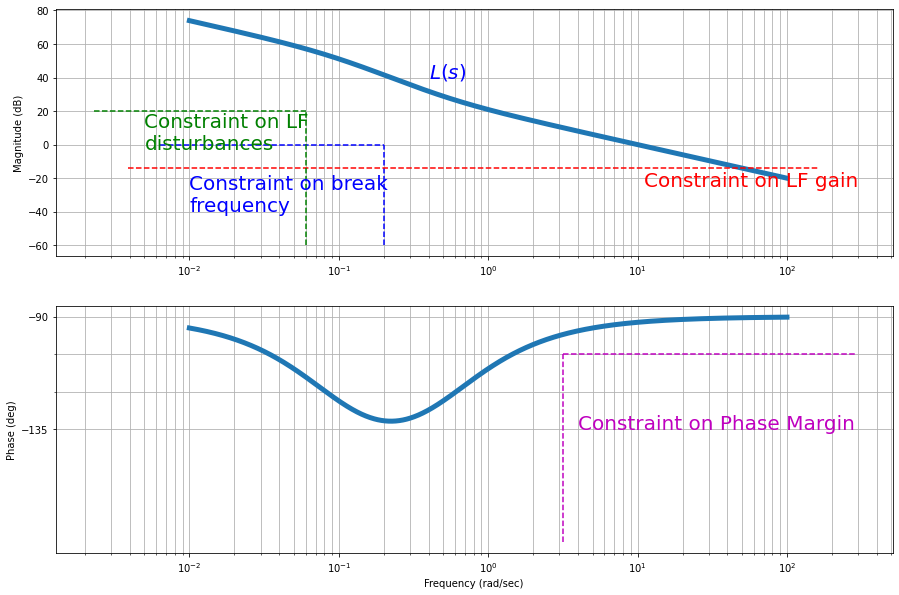

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(R*G, dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(0.4, 40, '$L(s)$', color='blue', fontsize=20)

# Break frequency: w>=0.2 rad/s
plt.plot([plt.xlim()[0], 0.2], [0, 0],'b--');
plt.plot([0.2, 0.2], [-60, 0],'b--');
plt.text(0.01, -40, 'Constraint on break \nfrequency', color='blue', fontsize=20);

plt.plot(plt.xlim(),[-14, -14],'r--');
plt.text(11, -25, 'Constraint on LF gain', color='red', fontsize=20);

plt.plot([plt.xlim()[0], 0.06], [20, 20],'g--');
plt.plot([0.06, 0.06], [-60, 20],'g--');
plt.text(0.005, -3, 'Constraint on LF\ndisturbances', color='green', fontsize=20);



plt.sca(ax2)                 # phase plot
plt.plot([3.16, 3.16], [-180, -180+75], 'm--')
plt.plot([3.16, plt.xlim()[1]], [-180+75, -180+75], 'm--')
plt.text(4, -135, 'Constraint on Phase Margin', color='m', fontsize=20);

## Noise rejections: measurement noise

<table style='margin: 0 auto' rules=none>
<tr>
    <!--td> <img src="img/disturbances-1.png" alt="disturbances-1" style="width: 550px;"/> </td-->
    <td> <img src="img/system-generic.png" alt="system-generic" style="width: 550px;"/> </td>
</tr>
</table>

$$
Y(s) = \frac{RG}{1+RG}N(s) = \frac{L(s)}{1+L(s)}N(s) 
$$

Complementary Sensitivity function:
$$
T = \frac{L(s)}{1+L(s)}
$$

- Maps the noise input $n$ to the output $y$
- Noise rejection defines high frequency specifications
- $S+T=1$

- Note that $T$ is also the transfer function from $y_{ref}$ to $y$.
- If $|L|=|RG|$ is small at frequencies where the noise $n$ is concentrated then $|T|$ will be small and the effect of the noise on the output is minimised.
- Measurement noise tend to occur at high frequency and this means that typically we would like $|L|=|RG|$ to be small at high frequency
- This constraint does not conflict with the low-frequency constraints for the disturbance $d$ and the reference $y_{ref}$.

- We need the complementary sensitivity function $\approx 1$ at low frequency (steady state) to meet control requirements
- Noise rejection must then be: $H(j\omega) \ll 1$ for $\omega \gg ...$

- **Note: since noise rejection happens at high frequency, it is not possible to have low tracking errors if sensors are noisy in the LF regime**

$$
|H(j\omega)| \le \epsilon, \hspace{0.5cm} \text{when} \hspace{0.5cm} \omega \in [\omega_n, \infty]
$$

$$
\Downarrow
$$


$$
|H(j\omega)|=\frac{L(j\omega)}{1+L(j\omega)} \le \epsilon, \hspace{0.5cm} \approx |L(j\omega)| \le {\epsilon}
$$

- This means that rejecting measurement noise translates into a new constraint at high frequency in the Bode plot of the loop transfer function $L(j\omega)$.

Let's see what happens in our previous example:

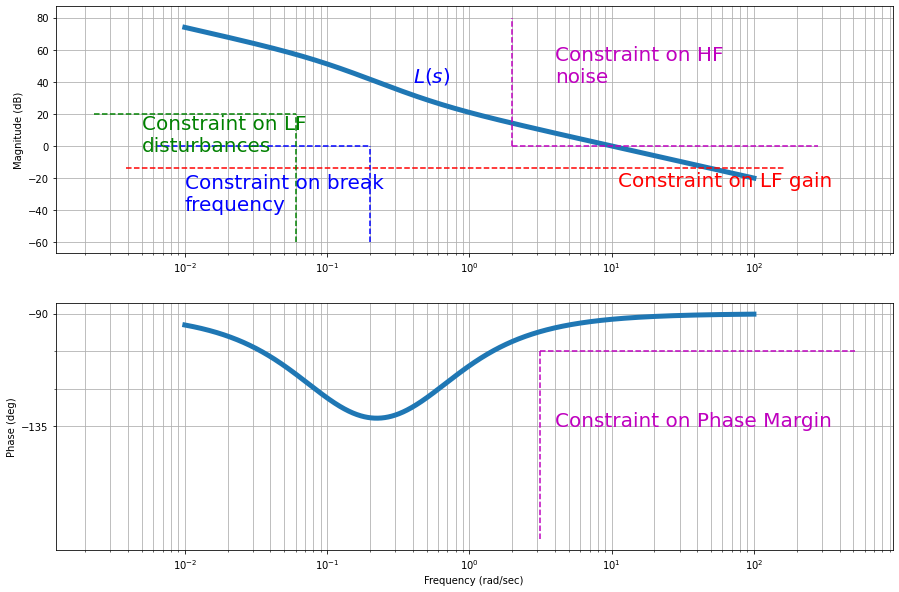

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(R*G, dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(0.4, 40, '$L(s)$', color='blue', fontsize=20)

# Break frequency: w>=0.2 rad/s
plt.plot([plt.xlim()[0], 0.2], [0, 0],'b--');
plt.plot([0.2, 0.2], [-60, 0],'b--');
plt.text(0.01, -40, 'Constraint on break \nfrequency', color='blue', fontsize=20);

plt.plot(plt.xlim(),[-14, -14],'r--');
plt.text(11, -25, 'Constraint on LF gain', color='red', fontsize=20);

plt.plot([plt.xlim()[0], 0.06], [20, 20],'g--');
plt.plot([0.06, 0.06], [-60, 20],'g--');
plt.text(0.005, -3, 'Constraint on LF\ndisturbances', color='green', fontsize=20);

plt.plot([2, plt.xlim()[1]], [0, 0],'m--');
plt.plot([2, 2], [0, 80],'m--');
plt.text(4, 40, 'Constraint on HF\nnoise', color='m', fontsize=20);



plt.sca(ax2)                 # phase plot
plt.plot([3.16, 3.16], [-180, -180+75], 'm--')
plt.plot([3.16, plt.xlim()[1]], [-180+75, -180+75], 'm--')
plt.text(4, -135, 'Constraint on Phase Margin', color='m', fontsize=20);

- Our controller does not meet noise rejection requirements for $\omega > 2$ rad/s

### Control Sensitivity

<table style='margin: 0 auto' rules=none>
<tr>
    <!--td> <img src="img/disturbances-1.png" alt="disturbances-1" style="width: 550px;"/> </td-->
    <td> <img src="img/system-generic.png" alt="system-generic" style="width: 550px;"/> </td>
</tr>
</table>

$$
U(s) = \frac{R}{1+RG}Y_{ref}(s) = \frac{R}{1+L}Y_{ref} = Q(s)Y_{ref}
$$

where 

$$
Q(s)=\frac{R(s)}{1+L(s)}
$$

- Makes it possible to analyse the control output $u$ as a function of the reference signal $y_{ref}$ (or of the measurement noise $n$) 
- Can be used to include in the control design constraints due to limits on actuators

As usual, let's plot the Bode plots of the control sensitivity function $Q(s)$:

$$
|Q(j\omega)|=\frac{|R(j\omega)|}{|1+L(j\omega)|}
$$

- for $\omega \rightarrow 0 \Rightarrow |Q(j\omega)| \approx \frac{1}{G(j\omega)}$
   - we would like $L$ big at LF

- for $\omega \rightarrow \infty \Rightarrow |Q(j\omega)| \approx {R(j\omega)}$
   - we would like $L$ small at HF

- for $\omega = \omega_{nc} \Rightarrow |L(j\omega)| = 1 \Rightarrow |Q(j\omega)| = \frac{1}{G(j\omega)}$

## Some consequences 

Typically:

- $|G(j\omega)| \ll 1$, when $\omega \ge \omega_{bp}$ 
   - Low-pass behaviour of the plant

- Let's consider the bandwidth at 0dB, then:
- if $\omega_nc > \omega_bp$, $\Rightarrow |L(j\omega)| > 1$, for $\omega \in (\omega_{bp}, \omega_{nc})$
   - $|L(j\omega)|$ has a larger bandwidth than the plant.
- in this case:
   - $|Q(j\omega)| \approx \frac{1}{G(j\omega)} \gg 1$, for $\omega \in (\omega_{bp}, \omega_{nc})$
   
- Enlarging the bandwidth of the plant might lead to high control values, which might not be acceptable!
- **Take away: never extend the bandwidth too much**
- This means that we have another constraint at high frequency due to the control sensitivity:

$$
|L(j\omega)| < \epsilon_u, \hspace{0.5cm} \text{for} \hspace{0.5cm} \omega \ge \omega_u
$$

$$
|R(j\omega)| < \epsilon_{ru}, \hspace{0.5cm} \text{for} \hspace{0.5cm} \omega \ge \omega_{ru}
$$

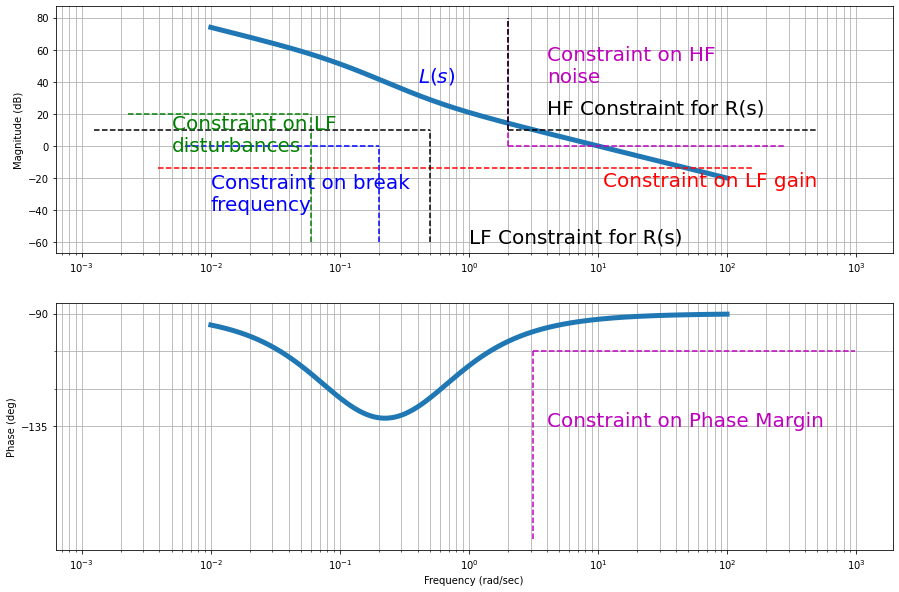

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode_plot(R*G, dB=True, omega_limits=(0.01, 100), linewidth=5);

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(0.4, 40, '$L(s)$', color='blue', fontsize=20)

# Break frequency: w>=0.2 rad/s
plt.plot([plt.xlim()[0], 0.2], [0, 0],'b--');
plt.plot([0.2, 0.2], [-60, 0],'b--');
plt.text(0.01, -40, 'Constraint on break \nfrequency', color='blue', fontsize=20);

plt.plot(plt.xlim(),[-14, -14],'r--');
plt.text(11, -25, 'Constraint on LF gain', color='red', fontsize=20);

plt.plot([plt.xlim()[0], 0.06], [20, 20],'g--');
plt.plot([0.06, 0.06], [-60, 20],'g--');
plt.text(0.005, -3, 'Constraint on LF\ndisturbances', color='green', fontsize=20);

plt.plot([2, plt.xlim()[1]], [0, 0],'m--');
plt.plot([2, 2], [0, 80],'m--');
plt.text(4, 40, 'Constraint on HF\nnoise', color='m', fontsize=20);

plt.plot([2, plt.xlim()[1]], [10, 10],'k--');
plt.plot([2, 2], [10, 80],'k--');
plt.text(4, 20, 'HF Constraint for R(s)', color='k', fontsize=20);

plt.plot([plt.xlim()[0], 0.5], [10, 10],'k--');
plt.plot([0.5, 0.5], [-60, 10],'k--');
plt.text(1, -60, 'LF Constraint for R(s)', color='k', fontsize=20);



plt.sca(ax2)                 # phase plot
plt.plot([3.16, 3.16], [-180, -180+75], 'm--')
plt.plot([3.16, plt.xlim()[1]], [-180+75, -180+75], 'm--')
plt.text(4, -135, 'Constraint on Phase Margin', color='m', fontsize=20);

- Designing a controller, it is not trivial, even in the simple example that we are considering.

### Discussions

- Too strigent design requirements can make the controller design very difficult or even impossible
- The first thing to do is always to verify that requirements are feasible for our problem: sometime it is better to buy better sensors, rather than desiging a controller with requirements too strict

#### Computer Aided Control System Design
Numarically implement analytic rules that we have been discussing, and that can only be manually applied in simple cases.

- MATLAB + Simulink + SISOTool: Quite powerful. It is one of the most used.
- Python Control Library: More limited, but can still be effective. This is what we are using!